In [5]:
import pandas as pd
pd.__version__

'1.0.1'

In [6]:
# to imbed plots, prevents pop-up windows for plots
%matplotlib inline

In [3]:
df = pd.read_csv('data/goog.csv' , index_col='Date' , parse_dates=True )

* ``Conditionsl`` Data Frames

In [18]:
df[df['High'] == df['Close']].head()

,Open,High,Low,Close,Volume
Date,,,,,
2011-04-29,269.73,271.78,268.99,271.78,NaN
2011-10-13,274.74,279.22,273.74,279.22,NaN
2011-11-03,293.21,298.45,291.57,298.45,NaN
2012-06-22,283.72,285.45,282.63,285.45,NaN
2013-07-12,459.54,461.04,457.16,461.04,NaN


In [19]:
# to filtering out the missing data

df_filtered = df[pd.isnull(df['Volume']) == False]
df_filtered.head()

,Open,High,Low,Close,Volume
Date,,,,,
2014-03-27,564.86,565.40,550.50,556.58,3826676.0
2014-03-28,558.94,566.03,558.33,559.51,2258918.0
2014-03-31,564.63,566.93,555.87,556.70,1942277.0
2014-04-01,559.57,568.18,558.44,566.88,2182626.0
2014-04-02,282.43,571.83,561.44,566.98,2088804.0


In [21]:
# daily percentage change
df['Return'] = df['Close'].pct_change()
df['Return'].head()

Date
2010-01-04         NaN
2010-01-05   -0.004408
2010-01-06   -0.025186
2010-01-07   -0.023303
2010-01-08    0.013345
Name: Return, dtype: float64

In [23]:
# Compute the log() of the return using numpy
# Append another new column
import numpy as np
df['LogReturn'] = np.log(1+df['Return'])

In [24]:
google = df

In [25]:
google['LogReturn'].head()

Date
2010-01-04         NaN
2010-01-05   -0.004418
2010-01-06   -0.025509
2010-01-07   -0.023578
2010-01-08    0.013256
Name: LogReturn, dtype: float64

NameError: name 'plt' is not defined

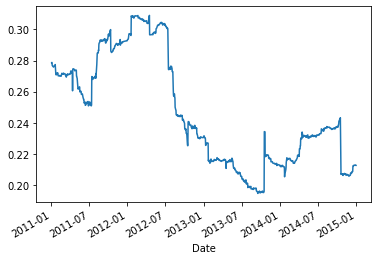

In [30]:
# Compute volatility as rolling standard deviation of the log() of the returns
# Append yet another new column
window_size = 252
google['Volatility'] = google['LogReturn'].rolling(window=window_size).std() * np.sqrt(window_size)
google['Volatility'].iloc[window_size-5:window_size+5]

google['Volatility'].plot()
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000194BF0C8C88>,
      dtype=object)

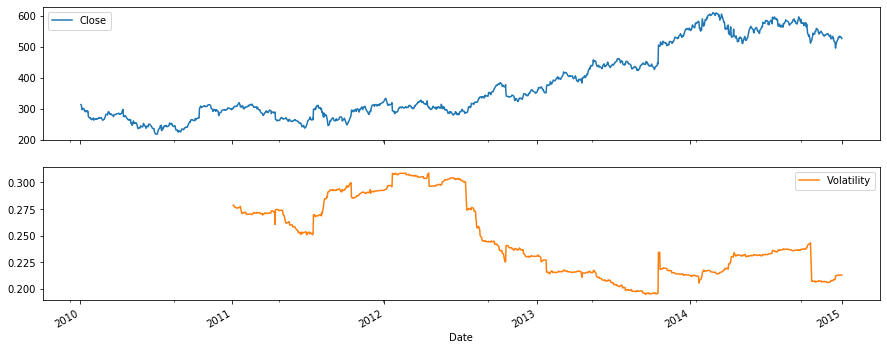

In [31]:
google[['Close','Volatility']].plot(subplots=True, figsize=(15,6))

In [35]:
# Numerical computing
import numpy as np
# Draw pictures!
import matplotlib.pyplot as plt
%matplotlib inline
# Python people are weird!
import pandas as pd
# Set Jupyter notebook display options
pd.options.display.max_rows = 8
pd.options.display.max_columns = 8
# Check version number
pd.__version__

'1.0.1'

In [36]:
file   = "data/exoplanets.csv"
data   = pd.read_csv(file)
series = data['NAME']
# pd.series method gives some sort of index to the given list
# dict also can be converted to pd sereis also

### example of creating series from np array

In [37]:
array1  = np.arange(1,6)*10.0
series1 = pd.Series(array1)

In [38]:
series1.index
# The Index is used for indexing
print( series1.iloc[0] )  # "Positional" indexing

10.0


In [39]:
# The Index can be set to a sequence of labels:
index2 = ['a','b','c','d','a']
series2 = pd.Series(np.arange(1,6)*10.0, index=index2)

### Now we can use here loc methode for accessing the values

In [40]:
series2.loc['b']  # "label" indexing

20.0

In [41]:
for key, value in series2.iteritems():
    print(key, value)

a 10.0
b 20.0
c 30.0
d 40.0
a 50.0


## Here we can use slicing as well with the help of iloc function iloc[ : ]

In [42]:
series2.iloc[:-3] # slicing from the beginning

a    10.0
b    20.0
dtype: float64

In [43]:
# Example: slice with labels, but with integer step size
series2.loc['d':'b':-2]

d    40.0
b    20.0
dtype: float64

## Series Arthematic

In [44]:
series3 = series2 * 3
print(series3)

a     30.0
b     60.0
c     90.0
d    120.0
a    150.0
dtype: float64


# Even though pandas was built on numpy, numpy methods on Series return a Series

series_sin = np.sin( series_2pi )

In [47]:
series1 = pd.Series([1,2,3,4,5])
#print(series1)

series2 = pd.Series([10,20,30,40,50])
#print(series2)

series3 = series1 + series2
#print(series3)

# Even better when you assign labels to your data!

series1 = pd.Series([1,2,3,4,5],      index=['a','b','c','d','e'])
series2 = pd.Series([10,20,30,40,50], index=['c','d','e','f','g'])

print( series1 + series2 )

a     NaN
b     NaN
c    13.0
d    24.0
e    35.0
f     NaN
g     NaN
dtype: float64


In [48]:
# Contrast how NumPy and Pandas handle NaN:

print( "Pandas mean: ", pd.Series( [1.0, 2.0, np.nan] ).mean() )
print( "Numpy mean:  ", np.array(  [1.0, 2.0, np.nan] ).mean() )

Pandas mean:  1.5
Numpy mean:   nan


``for key, value in df_grades['Alice'].iteritems():``
    ``print('Key:', '%s' % key, ', Value:', '%s' % value)``
    
    
``for index, row in df_grades.iterrows():``
    ``print('Index:', '%s' % index, ', Row:', '%s' % row['Alice'])``

## df_row = df_grades.loc['Jan':'Jan']
## print( df_row, "\n", type(df_row) )
## df_row = df_grades.loc['Jan':'Mar' , 'Column_name']

In [3]:
# Remove old tmp dir, Create a new tmp dir
import os
if not os.path.exists("tmp"):
    os.mkdir("tmp")

# Define a convenience function to help us clean up
def clean_tmp(file_name="tmp/exoplanet.csv"):
    if os.path.isfile(file_name):
        os.remove(file_name)

In [8]:
file_name = "data/exoplanets.csv"
data = pd.read_csv(file_name)

### You can sort by the Index

In [9]:
data = data.set_index(data.index.sort_values(ascending=False))

,NAME,FIRSTREF,FIRSTURL,DATE,NUM_OBS,MASS(mjupiter),RADIUS(rjupiter),PERIOD(day),ECCENTRICITY,SEMI_MAJOR_AXIS(AU),SEPARATION(AU),STAR_NAME,DIST(PARSEC),RA_STRING(h:m:s),DEC_STRING(d:m:s),STAR_MASS(msun),STAR_RADIUS(rsun)
1641,gamma Cep b,Campbell 1988,http://adsabs.harvard.edu/abs/1988ApJ...331..902C,1988,131.0,1.517280,NaN,905.5740,0.1200,1.979300,1.979300,gamma Cep,14.1024,+23:39:20.98,+77:37:55.08,1.260000,5.010000
1640,HD 114762 b,Latham 1989,http://adsabs.harvard.edu/abs/1989Natur.339...38L,1989,74.0,11.635100,NaN,83.9151,0.3354,0.362932,0.362932,HD 114762,38.6548,+13:12:20.10,+17:31:01.66,0.894578,0.859205
1639,PSR B1257+12 B,Wolszczan 1992,http://adsabs.harvard.edu//abs/1992Natur.355.....,1992,NaN,0.013531,NaN,66.5419,0.0186,0.321369,0.321369,PSR B1257+12,NaN,13:00:03.577,+12:40:56.4,NaN,NaN


## CleanUp the data

### Change the label of a single column

In [11]:
data = data.rename(columns={'NAME':'PLANET'})

## File Formates

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

In [15]:
# these are the all file that pandas can read those
print("".join(["pd.%s\n" % reader 
               for reader in dir(pd) 
               if reader.startswith('read_')]))

## in thse formate we can convert the file effectivily
print("".join(["pd.%s\n" % reader 
               for reader in dir(pd.DataFrame) 
               if reader.startswith('to_')]))

pd.read_clipboard
pd.read_csv
pd.read_excel
pd.read_feather
pd.read_fwf
pd.read_gbq
pd.read_hdf
pd.read_html
pd.read_json
pd.read_orc
pd.read_parquet
pd.read_pickle
pd.read_sas
pd.read_spss
pd.read_sql
pd.read_sql_query
pd.read_sql_table
pd.read_stata
pd.read_table

pd.to_clipboard
pd.to_csv
pd.to_dict
pd.to_excel
pd.to_feather
pd.to_gbq
pd.to_hdf
pd.to_html
pd.to_json
pd.to_latex
pd.to_markdown
pd.to_numpy
pd.to_parquet
pd.to_period
pd.to_pickle
pd.to_records
pd.to_sql
pd.to_stata
pd.to_string
pd.to_timestamp
pd.to_xarray



In [16]:
df = pd.read_csv('data/exoplanets.csv', 
                 parse_dates=['DATE'],
                 encoding='utf-8')

In [19]:
df.to_csv('tmp/exoplanets.csv', index=False, encoding='utf-8')